# Non-linear ordinary differential equations showing chaotic behaviour: 

#                     LORENTZ EQUATIONS

Solving the following set of equations
$$\frac{dx(t)}{dt}=\sigma [y(t)-x(t)],$$
$$\frac{dy(t)}{dt}=x(t)[\rho - z(t)]-y(t),$$
$$\frac{dz(t)}{dt}=x(t)y(t)-\beta z(t)$$

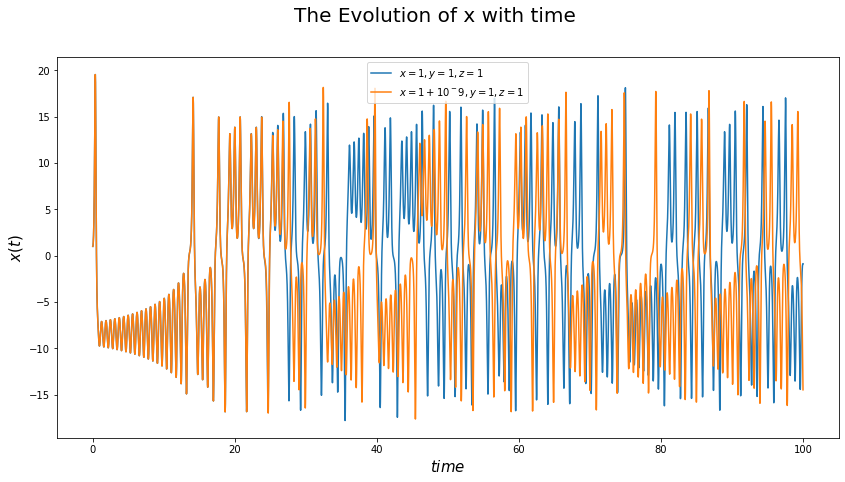

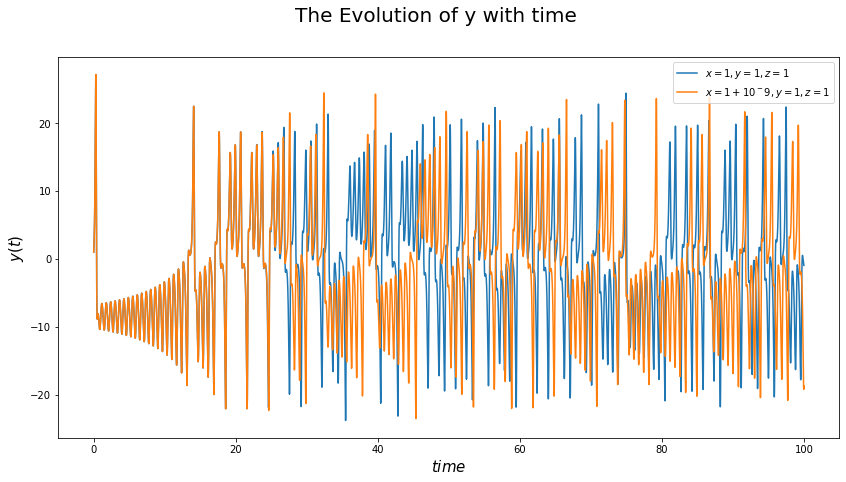

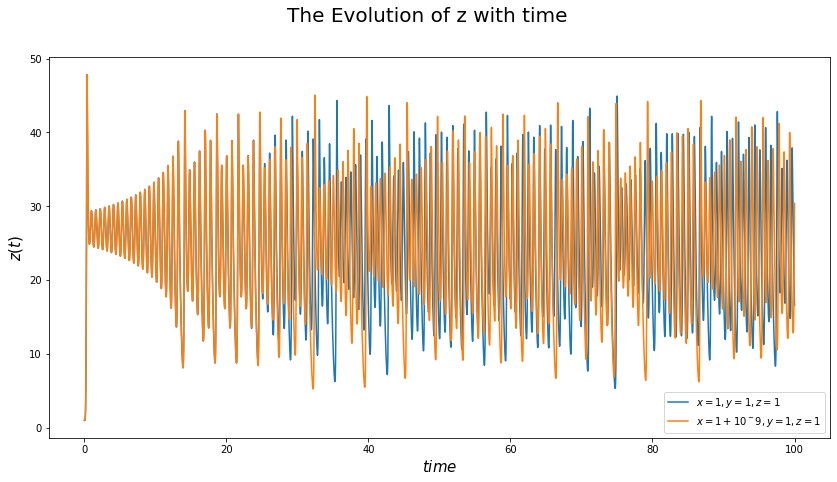

In [9]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

# X here will contain X[0]=x, X[1]=y, X[2]=z
def func(X, t, a1, a2, a3):      
    dX_dt=[a1*(X[1] - X[0]), X[0]*(a2 - X[2]) - X[1], X[0]*X[1] - a3*X[2]]
    return dX_dt

# Defining parameters of the system
sigma      =10
rho        =28
beta       =8/3

# The two sets of initial values
initial1 = [1., 1., 1.]
initial2 = [1 + (10**(-9)), 1., 1.]

# Calling the function odeint
t       = np.linspace(0, 100, 10001)
soln1   = odeint(func, initial1, t, args = (sigma, rho, beta))
soln2   = odeint(func, initial2, t, args = (sigma, rho, beta))

# Plotting
plt.figure(figsize = (14,7))
plt.plot(t, soln1[:,0], label='$x=1, y=1, z=1$')
plt.plot(t, soln2[:,0], label='$x=1+10^-9, y=1, z=1$')
plt.suptitle('The Evolution of x with time',fontsize=20)
plt.xlabel('$time$',fontsize = 15)
plt.ylabel('$x(t)$',fontsize = 15)
plt.legend()
plt.show()

plt.figure(figsize = (14,7))
plt.plot(t, soln1[:,1], label='$x=1, y=1, z=1$')
plt.plot(t, soln2[:,1], label='$x=1+10^-9, y=1, z=1$')
plt.suptitle('The Evolution of y with time',fontsize=20)
plt.xlabel('$time$',fontsize = 15)
plt.ylabel('$y(t)$',fontsize = 15)
plt.legend()
plt.show()

plt.figure(figsize = (14,7))
plt.plot(t, soln1[:,2], label='$x=1, y=1, z=1$')
plt.plot(t, soln2[:,2], label='$x=1+10^-9, y=1, z=1$')
plt.suptitle('The Evolution of z with time',fontsize=20)
plt.xlabel('$time$',fontsize = 15)
plt.ylabel('$z(t)$',fontsize = 15)
plt.legend()
plt.show()

Making a 3D plot of x, y, z. One should see the famous butterfly shape structure

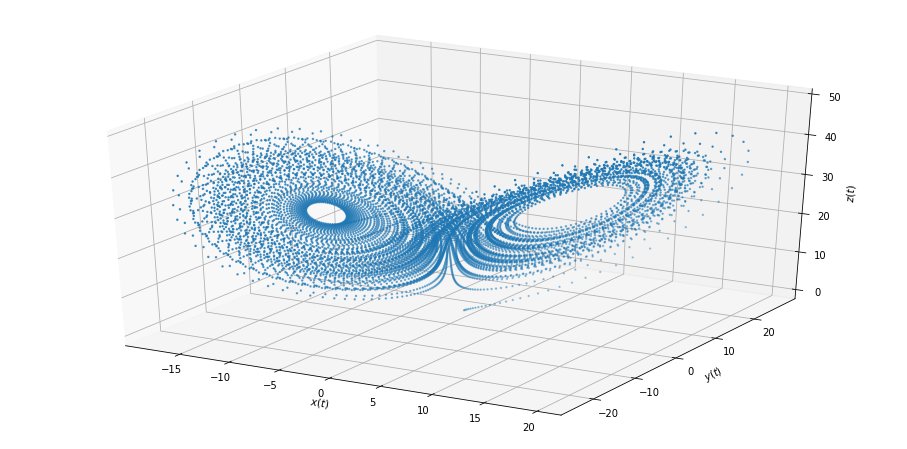

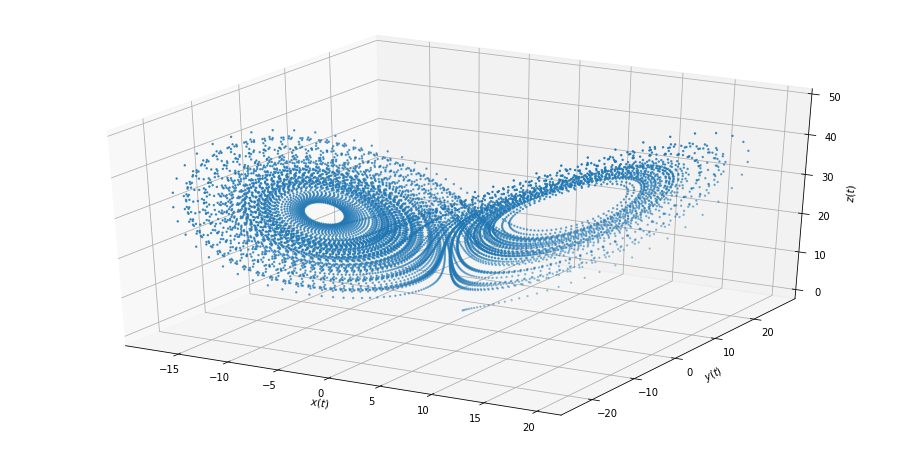

In [10]:

fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(111,projection='3d')
ax1.scatter(soln1[:,0], soln1[:,1], soln1[:,2], s=2)
ax1.set_xlabel('$x(t)$', fontsize = 10)
ax1.set_ylabel('$y(t)$', fontsize = 10)
ax1.set_zlabel('$z(t)$', fontsize = 10)
plt.show()

fig = plt.figure(figsize = (16,8))
ax2 = fig.add_subplot(111,projection='3d')
ax2.scatter(soln2[:,0], soln2[:,1], soln2[:,2], s=2)
ax2.set_xlabel('$x(t)$', fontsize = 10)
ax2.set_ylabel('$y(t)$', fontsize = 10)
ax2.set_zlabel('$z(t)$', fontsize = 10)

plt.show()

Making a 2D animation of the above


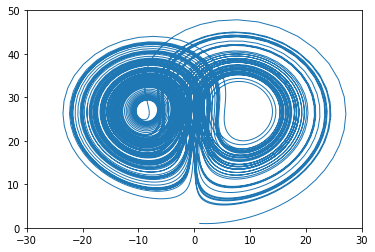

In [11]:
#Animation for y and z variable

%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML
fig, ax = plt.subplots()

ax.set_xlim(( -30, 30))
ax.set_ylim((0, 50))
line, = ax.plot([], [], lw=1)
def init():
    line.set_data([], [])
    return (line,)
def animate(i):
    x = soln2[0:i,1]
    y = soln2[0:i,2]
    line.set_data(x, y)
    return (line,)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=10001, interval=20,blit=True)
HTML(anim.to_html5_video())